<a href="https://colab.research.google.com/github/rajteer/Kwanciki/blob/main/Kwanty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dwuwymiarowa studnia potencjału

In [ ]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
import matplotlib.animation as animation

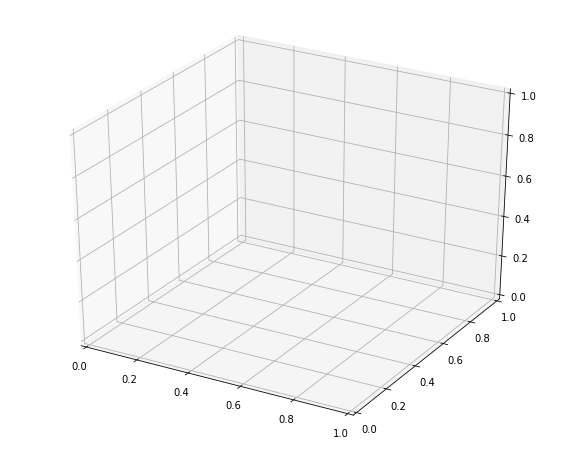

In [ ]:
Nfrm = 100
def generate(X, Y, phi):
    R = np.real(np.sqrt(4.0) * np.sin(3 * np.pi * X)*np.sin(3 * np.pi * Y)*np.exp(-1j * 3**2 * np.pi**2 * 1 / (2 * 3)* phi))
    return R
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')


In [ ]:

# Make the X, Y meshgrid.
xs = np.linspace(0, 1, 100)
ys = np.linspace(0, 1, 100)
X, Y = np.meshgrid(xs, ys)

# Set the z axis limits so they aren't recalculated each frame.
ax.set_zlim(-2, 2)

# Begin plotting.
wframe = None
Z = generate(X, Y, 0)
def update(idx):
    phi=phis[idx]
    global wframe
    # If a line collection is already remove it before drawing.
    if wframe:
        ax.collections.remove(wframe)
    # Plot the new wireframe and pause briefly before continuing.
    Z = generate(X, Y, phi)
    wframe = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap="magma", linewidth=0.5)
    
phis = np.linspace(0, 1, 100)
ani = animation.FuncAnimation(fig, update, Nfrm, interval=50)
HTML(ani.to_html5_video())

In [ ]:
def En2D(n,m,L1,L2): return ((float(n)/L1)**2+ (float(m)/L2)**2)

Text(0.5, 1.0, 'Drabinka energetyczna \n')

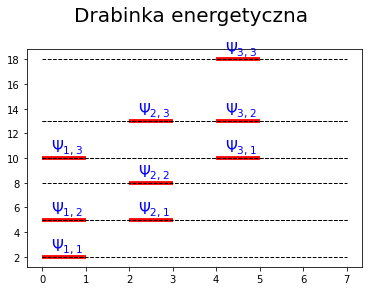

In [ ]:
for n in range(1,4):
    for m in range(1, 4):
        str1='$'+r'\Psi_{'+str(n)+r','+str(m)+r'}$'
        plt.text(n*2-1.8, En2D(n,m,1,1)+ 0.5, str1, fontsize=15, color="blue")
        plt.hlines(En2D(n,m,1,1), n*2-2, n*2-1, linewidth=3.8, color="red")
        plt.hlines(En2D(n,m,1,1), 0.0, 3*2+1, linewidth=1., linestyle='--', color="black")
plt.title("Drabinka energetyczna \n", fontsize=20)